Baseado no exemplo prático deste bloco com a implementação do autoencoder utilizando o dataset MNIST, implementar utilizando a mesma técnica para processar o dataset fashion_mnist, que se encontra na própria API Keras (from keras.datasets import fashion_mnist) (https://keras.io/api/datasets/fashion_mnist/).

# Importando as bibliotecas

In [3]:
import numpy as np  # Biblioteca para operações matemáticas e manipulação de arrays
import matplotlib.pyplot as plt  # Biblioteca para visualização de dados
from keras.datasets import fashion_mnist  # Dataset de imagens de roupas
from keras.layers import Dense, Input, Activation, Dropout  # Camadas para construção do modelo
from keras.models import Sequential  # Estrutura sequencial para a rede neural

# Importando dataset

In [4]:
# Carregar o conjunto de dados Fashion-MNIST
# O Fashion-MNIST contém 70.000 imagens de roupas classificadas em 10 categorias
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalização

In [5]:
# Normalizar os valores dos pixels para o intervalo [0, 1]
# Isso melhora a estabilidade numérica do treinamento
x_train = x_train.astype("float32") / 255.
x_test = x_test.astype("float32") / 255.

# Vetorização

In [6]:
# Remodelar as imagens para vetores unidimensionais (784 pixels)
# As imagens de 28x28 são transformadas em vetores de tamanho 784
x_train = x_train.reshape((len(x_train), 784))
x_test = x_test.reshape((len(x_test), 784))

# Adição de ruído

In [7]:
# Aplicação de ruído nos dados
# Adicionamos ruído gaussiano para treinar o autoencoder como um denoising autoencoder
factor = 0.1
x_train_noisy = x_train + factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

In [8]:
# Garantir que os valores permaneçam no intervalo [0,1]
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Validação

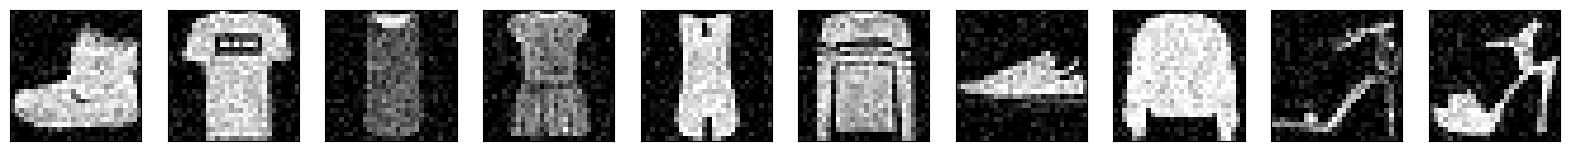

In [9]:
# Visualizar algumas imagens com ruído
n = 10  # Número de imagens a serem exibidas
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_train_noisy[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Modelo e treinamento

In [10]:
# Dimensão do espaço latente
# O número de neurônios na camada codificada do autoencoder
n_latent = 60

In [11]:
# Criando o modelo do autoencoder
# Arquitetura com camadas densas simétricas para codificação e decodificação
model = Sequential([
    Input(shape=(784,)),  # Definição explícita da entrada para evitar avisos
    Dense(400, activation="relu"),  # Primeira camada oculta
    Dense(200, activation="relu"),  # Segunda camada oculta
    Dense(n_latent, activation="relu"),  # Camada latente (representação comprimida)
    Dense(200, activation="relu"),  # Início da decodificação
    Dense(400, activation="relu"),
    Dense(784, activation="sigmoid")  # Camada de saída reconstruída
])

In [12]:
# Compilar o modelo
# Usamos Adam como otimizador e binary cross-entropy como função de perda
model.compile(optimizer='adam', loss='binary_crossentropy')

In [13]:
# Treinar o autoencoder
# O modelo aprende a reconstruir imagens limpas a partir de imagens com ruído
history = model.fit(x_train_noisy, x_train, epochs=30, batch_size=256, shuffle=True, validation_data=(x_test_noisy, x_test))

2025-02-04 18:27:10.824224: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/30


2025-02-04 18:27:11.114691: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


235/235 ━━━━━━━━━━━━━━━━━━━━ 15s 54ms/step - loss: 0.4187 - val_loss: 0.3083
Epoch 2/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 13s 54ms/step - loss: 0.3026 - val_loss: 0.2970
Epoch 3/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 13s 54ms/step - loss: 0.2928 - val_loss: 0.2925
Epoch 4/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 13s 55ms/step - loss: 0.2876 - val_loss: 0.2874
Epoch 5/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 13s 55ms/step - loss: 0.2835 - val_loss: 0.2853
Epoch 6/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 13s 55ms/step - loss: 0.2804 - val_loss: 0.2820
Epoch 7/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 13s 55ms/step - loss: 0.2796 - val_loss: 0.2806
Epoch 8/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 13s 55ms/step - loss: 0.2777 - val_loss: 0.2798
Epoch 9/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 13s 55ms/step - loss: 0.2763 - val_loss: 0.2779
Epoch 10/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 13s 55ms/step - loss: 0.2761 - val_loss: 0.2772
Epoch 11/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 13s 55ms/step - loss: 0.2744 - val_loss: 0.2764
Epoch 12/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 

In [14]:
# Codificar e decodificar as imagens de teste
# O modelo recebe imagens com ruído e tenta reconstruí-las
encoded_imgs = model.predict(x_test_noisy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


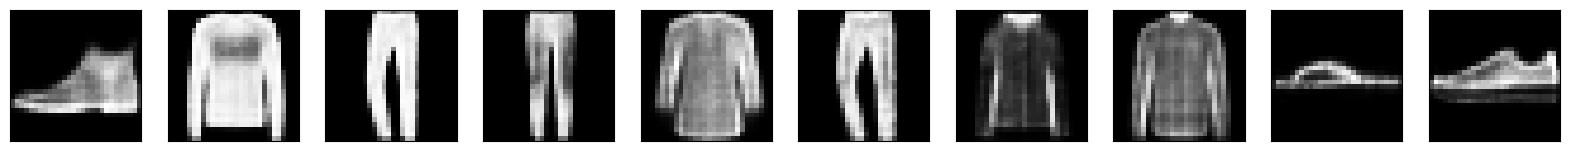

In [15]:
# Visualizar algumas imagens reconstruídas
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(encoded_imgs[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Métricas

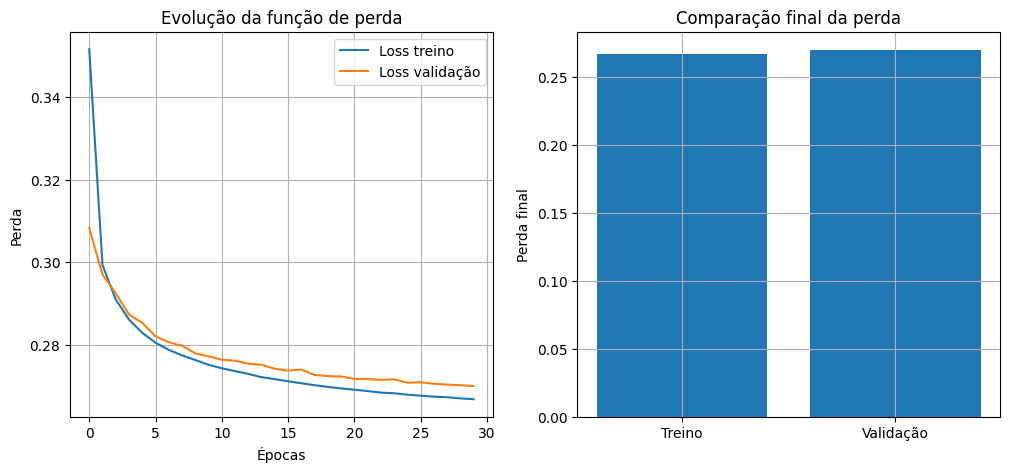

In [16]:
# Gerar métricas do treinamento
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss treino')
plt.plot(history.history['val_loss'], label='Loss validação')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.title('Evolução da função de perda')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.bar(['Treino', 'Validação'], [history.history['loss'][-1], history.history['val_loss'][-1]])
plt.ylabel('Perda final')
plt.title('Comparação final da perda')
plt.grid()

plt.show()